In [97]:
%pylab inline
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

Populating the interactive namespace from numpy and matplotlib


In [98]:
hs = pd.read_csv('hearthstone.csv')

In [99]:
hs['value'] = (hs.win.apply(lambda x: 1. if x else -1.)).astype(int)
won = hs['win'] == True
is_hunter = hs['my class'] == 'Hunter'
is_druid = hs['my class'] == 'Druid'

In [181]:
def plot_values(my_class_predicate):
    # A = win == True
    # B = opponent class == hunter (for instance)
    # P(A|B) = P(A and B) / P(B)
    # P(A and B) = hs[is_druid][won][against_hunter]
    # P(B) = hs[is_druid][against_hunter]
    grp = hs[my_class_predicate].groupby(['opponent class'])
    won_grp = hs[my_class_predicate][won].groupby(['opponent class'])
    total = len(hs[my_class_predicate])

    # Batch P(B): P(B) for every opponent class
    Pb = grp.win.count()/total
    print("P(B): %s" % Pb)
    print("Total: %s" % sum(Pb))

    # Batch P(A and B): P(A and B) for every opponent class
    Pa_and_b = won_grp.win.count()/total
    print("P(A and B): %s" % Pa_and_b)
    print("Total: %s" % sum(Pa_and_b))

    #sanity check
    print(sum(Pb))
    print(sum(Pb) == 1.0)
    assert (Pb >= Pa_and_b).all()
    assert sum(Pb) == 1.0
    assert sum(Pa_and_b) == 1.0
    
    p_winning_against = Pa_and_b/Pb
    print("P(A|B): %s" % p_winning_against)
    print('Expected value %s' % sum(p_winning_against))
    p_winning_against.plot(kind='bar')

In [182]:
plot_values(is_druid)

P(B): opponent class
Druid      0.105263
Hunter     0.078947
Mage       0.092105
Paladin    0.236842
Priest     0.144737
Rogue      0.013158
Shaman     0.105263
Warlock    0.157895
Warrior    0.065789
Name: win, dtype: float64
Total: 1.0
P(A and B): opponent class
Druid      0.052632
Hunter     0.026316
Mage       0.013158
Paladin    0.118421
Priest     0.065789
Rogue      0.013158
Shaman     0.052632
Warlock    0.105263
Warrior    0.013158
Name: win, dtype: float64
Total: 0.460526315789
1.0
False


AssertionError: 

P(B): opponent class
Druid      0.000
Hunter     1.000
Mage       0.500
Paladin    0.375
Priest     0.500
Rogue      1.000
Shaman     0.500
Warrior    0.000
Name: win, dtype: float64
P(A and B): opponent class
Hunter     1
Mage       1
Paladin    1
Priest     1
Rogue      1
Shaman     1
Name: win, dtype: float64
P(A|B): opponent class
Druid           NaN
Hunter     1.000000
Mage       2.000000
Paladin    2.666667
Priest     2.000000
Rogue      1.000000
Shaman     2.000000
Warrior         NaN
Name: win, dtype: float64
Expected value 10.6666666667


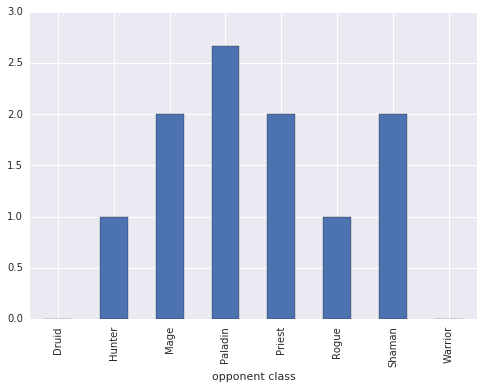

In [146]:
plot_values(is_hunter)

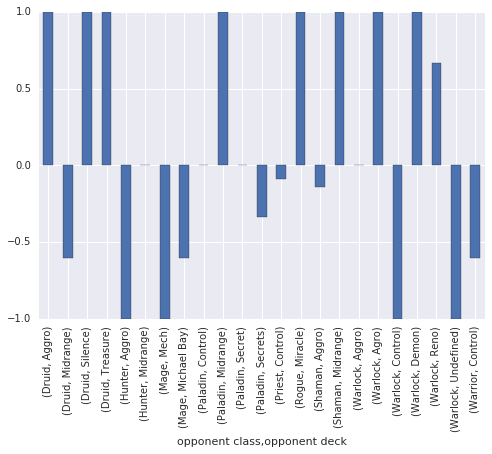

In [150]:
hs[is_druid].groupby(['opponent class', 'opponent deck'])['value'].mean().plot(kind='bar')